## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Business Understanding
# Data Understanding
# Data Preparation
# Modeling
# Regression Results
# Code Quality

In [2]:
# Business Understanding

In [3]:
# Data Understanding

In [4]:
# Datasets: KC House dataset
!ls data/

column_names.md  kc_house_data.csv


In [5]:
# Inspect content for the columns
!cat data/column_names.md

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

In [6]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
kc_house_data = pd.read_csv('./data/kc_house_data.csv', encoding='utf8')
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
kc_house_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [9]:
kc_house_data.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19009,6815100085,12/24/2014,1000000.0,4,2.00,3100,8000,1.5,NO,NONE,...,7 Average,2040,1060.0,1939,0.0,98103,47.6852,-122.329,1650,4000
12511,2799800180,3/23/2015,333000.0,4,2.50,2690,5505,2.0,NO,NONE,...,8 Good,2690,0.0,2004,0.0,98042,47.3666,-122.119,2690,5505
1619,1310500550,12/20/2014,248000.0,4,2.25,2320,8760,1.0,NO,NONE,...,8 Good,1160,1160.0,1966,0.0,98032,47.3627,-122.285,1970,8690
6042,3825310130,6/24/2014,751000.0,4,3.25,3090,9571,2.0,NO,NONE,...,9 Better,2370,720.0,2004,0.0,98052,47.7058,-122.131,3630,9110
14757,1695900150,5/28/2014,700000.0,2,1.75,2320,5500,1.5,NaN,AVERAGE,...,8 Good,1720,600.0,1925,2000.0,98144,47.5860,-122.292,2380,5000
16787,9197100101,5/4/2015,225000.0,2,1.00,1010,5408,1.0,NO,NONE,...,6 Low Average,1010,0.0,1926,0.0,98032,47.3759,-122.238,980,7800
13350,7504100910,10/6/2014,535000.0,3,2.50,2400,12546,1.0,NO,NONE,...,9 Better,2400,0.0,1983,NaN,98074,47.6317,-122.041,2940,12150
1723,2822069078,10/8/2014,368000.0,4,2.00,2500,36900,1.0,NO,NONE,...,7 Average,1540,960.0,1972,0.0,98038,47.3708,-122.049,1960,36900
10292,4365200505,10/3/2014,354000.0,2,1.00,1390,7740,1.0,NO,NONE,...,6 Low Average,1390,0.0,1925,0.0,98126,47.5232,-122.371,1290,7740
9167,5351200265,9/11/2014,1270000.0,4,3.25,3640,3604,2.0,NO,AVERAGE,...,9 Better,1960,1680.0,1913,0.0,98122,47.6145,-122.284,1940,4600


In [10]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
kc_house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
(kc_house_data['waterfront'].isna().sum() / kc_house_data.shape[0]) * 100

11.00152798999861

In [13]:
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
kc_house_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


<AxesSubplot:>

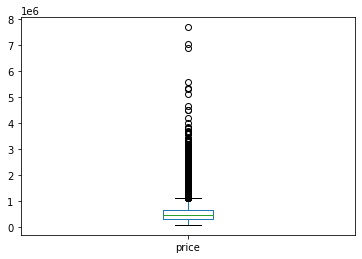

In [15]:
kc_house_data['price'].plot(kind='box')

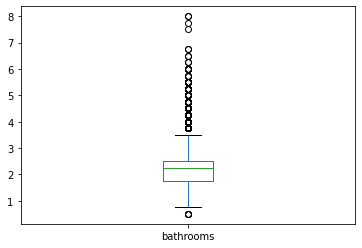

In [16]:
kc_house_data['bathrooms'].plot(kind='box');

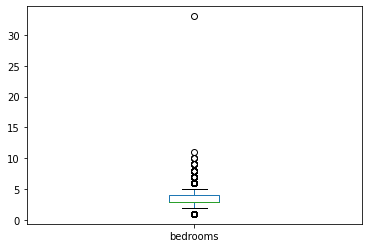

In [17]:
kc_house_data['bedrooms'].plot(kind='box');

In [18]:
kc_house_data.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The minimum price for a house is **\$78,000** and the maximum is **\$7,700,000**. The mean price of a house is **\$540,296.6** with a standard deviation of **\$367,368.1**

In [19]:
kc_house_data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [20]:
kc_house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [21]:
kc_house_data.loc[kc_house_data['bedrooms'] == 33, :]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [22]:
kc_house_data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [23]:
kc_house_data['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)

In [24]:
kc_house_data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

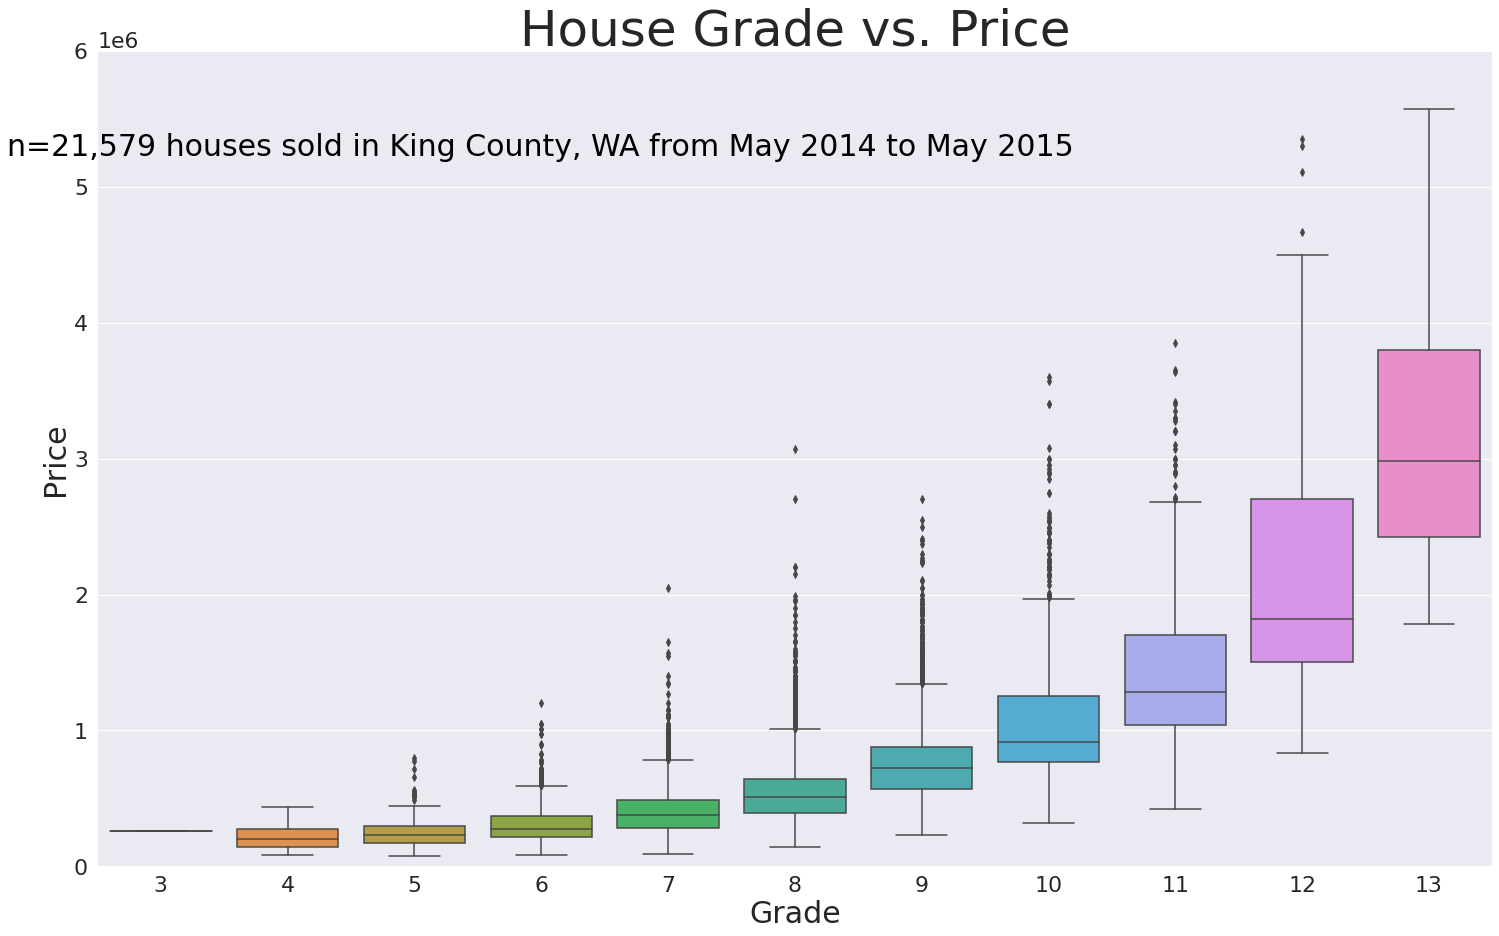

In [25]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
pal = sns.color_palette("husl", 8)
ax = sns.boxplot(x="grade", y="price", data=kc_house_data)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000)
ax.text(.7, .9, 'n=21,579 houses sold in King County, WA from May 2014 to May 2015',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);
# plt.savefig('./visualizations/grade.png')

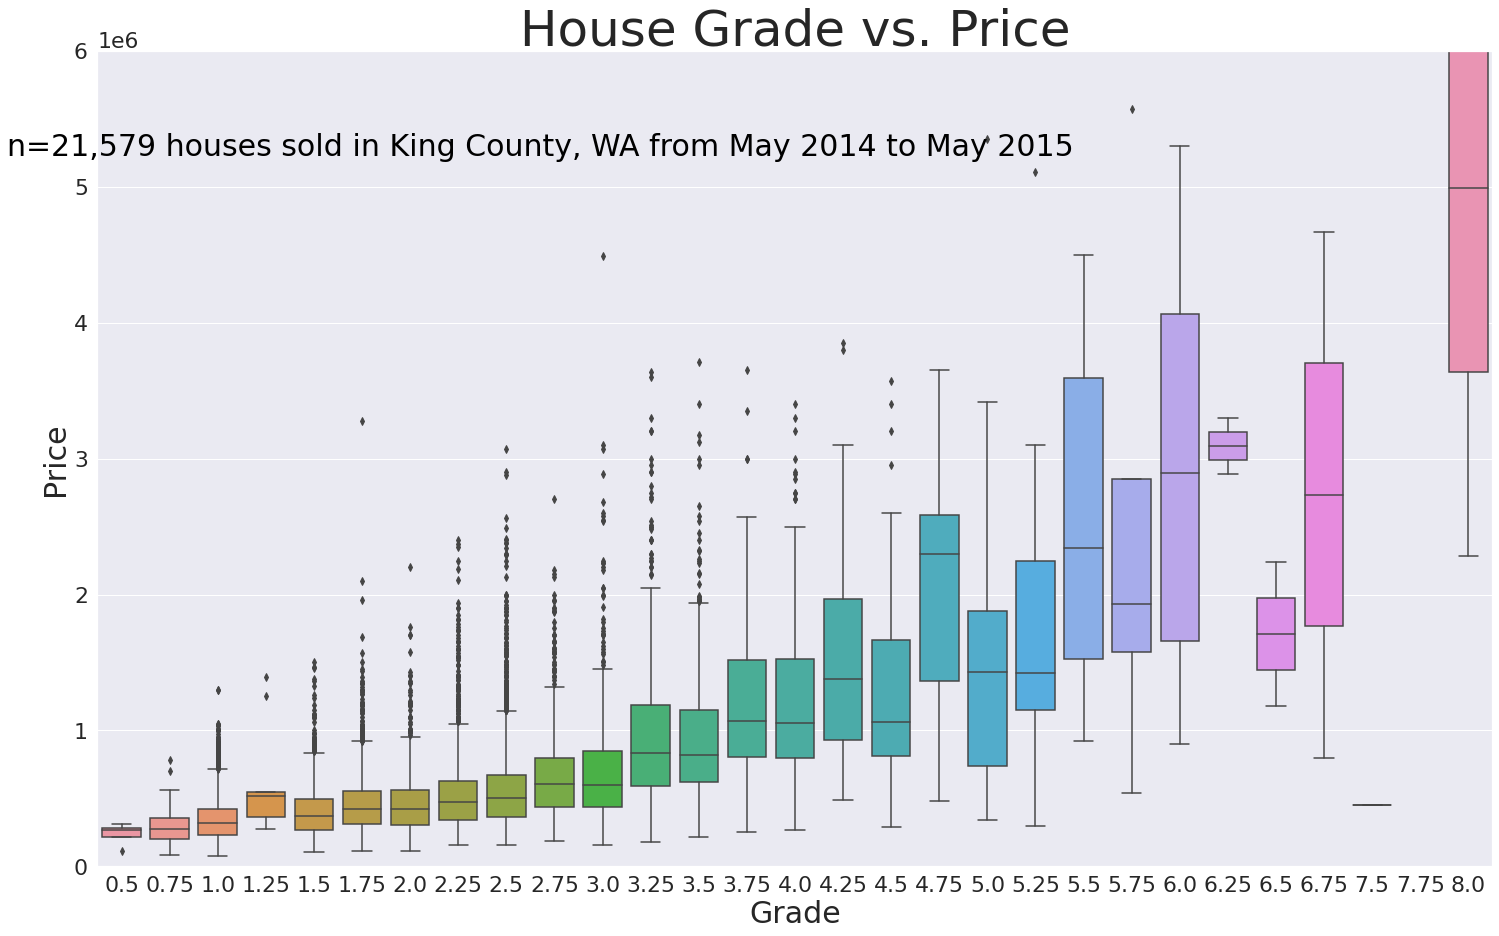

In [26]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
pal = sns.color_palette("husl", 8)
ax = sns.boxplot(x="bathrooms", y="price", data=kc_house_data)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000)
ax.text(.7, .9, 'n=21,579 houses sold in King County, WA from May 2014 to May 2015',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);
# plt.savefig('./visualizations/grade.png')

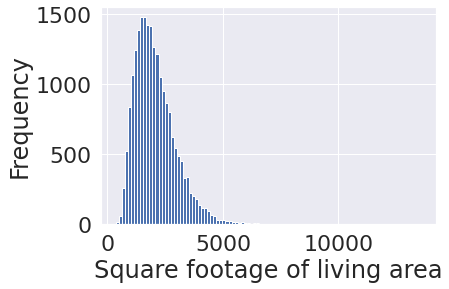

In [27]:
fig, ax = plt.subplots()
ax.set_xlabel('Square footage of living area')
ax.set_ylabel('Frequency')
ax.hist(kc_house_data['sqft_living'], bins=100);
# kc_house_data['sqft_living'].hist()

In [28]:
print("Skewness:", kc_house_data['sqft_living'].skew())
print("Kurtosis:", kc_house_data['sqft_living'].kurt())

Skewness: 1.473215455425834
Kurtosis: 5.252101950846816


In [29]:
kc_house_data['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [30]:
mean = kc_house_data['sqft_living'].mean()
mean

2080.3218502569803

In [31]:
std = kc_house_data['sqft_living'].std()
std

918.1061250800805

In [32]:
std_1 = mean + std
std_1m = mean - std
std_15 = mean + (1.5*std)
std_15m = mean - (1.5*std)

In [33]:
df = kc_house_data.loc[(kc_house_data['sqft_living']<std_15) & (kc_house_data['sqft_living']>std_15m)]

Skewness: 0.34744362219781993
Kurtosis: -0.7020749344943029


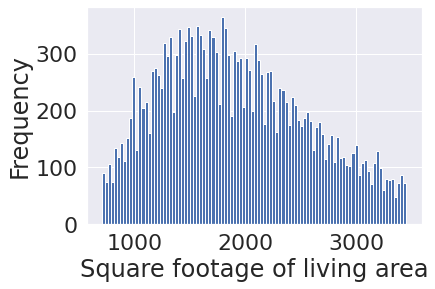

In [34]:
fig, ax = plt.subplots()
ax.set_xlabel('Square footage of living area')
ax.set_ylabel('Frequency')
ax.hist(df['sqft_living'], bins=100);
print("Skewness:", df['sqft_living'].skew())
print("Kurtosis:", df['sqft_living'].kurt())

In [35]:
kc_house_data['waterfront'].replace(to_replace=['NO', 'YES'], value=[0, 1], inplace=True)

In [36]:
kc_house_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2120.0        1
1920.0        1
862.0         1
2720.0        1
2580.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [37]:
kc_house_data['sqft_basement'].replace(to_replace=['?'], value=[0], inplace=True)

In [38]:
kc_house_data['sqft_basement'].value_counts()

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
417.0         1
2180.0        1
248.0         1
475.0         1
1930.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [41]:
kc_house_data['sqft_basement'] = kc_house_data['sqft_basement'].astype('float')

In [43]:
kc_house_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.008188,-0.010799,-0.004359,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.667951,0.605368,0.321108,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.356563,0.479386,0.297229,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.665838,0.686668,0.278485,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.762779,0.876448,0.428660,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.114731,0.184139,0.015031,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.458794,0.523989,-0.241866,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.087383,0.075463,0.088213,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,1.000000,0.756073,0.165843,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.075463,0.756073,1.000000,-0.051175,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077


In [39]:
Data Preparation

SyntaxError: invalid syntax (<ipython-input-39-4edde1068ebb>, line 1)